In [1]:
import pandas as pd

In [2]:
lcn = pd.read_csv(r"C:\Users\DELL\Documents\LungCapData.csv")
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [3]:
lcn.Gender = lcn.Gender.replace({'male':0 , 'female':1})
lcn.Smoke = lcn.Smoke.replace({'no':0, 'yes':1})
lcn.Caesarean= lcn.Caesarean.replace({'no':0 , 'yes':1})

In [4]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

lcn_train , lcn_test = train_test_split(lcn,test_size =.2)

lcn_train_x = lcn_train.iloc[:,1::]
lcn_train_y = lcn_train.iloc[:,0]
lcn_test_x   = lcn_test.iloc[:,1::]
lcn_test_y  = lcn_test.iloc[:,0]

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [7]:
linreg.fit(lcn_train_x , lcn_train_y)   #model created

LinearRegression()

In [8]:
Rsquare = linreg.score(lcn_train_x , lcn_train_y)
Rsquare

0.8547854157398196

In [9]:
N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

Adjusted_Rsquare = 1-(1-Rsquare)*(N-1)/ (N-K-1)
Adjusted_Rsquare

0.8535204803368563

In [10]:
linreg.coef_

array([ 0.15796262,  0.26993191, -0.70694908, -0.43657408, -0.13600347])

In [11]:
pred_train = linreg.predict(lcn_train_x)
# its doing prediction for all the records in lcn_train_x data

In [12]:
pred_train

array([12.60747723,  3.459788  ,  5.06572086,  5.90650631,  6.38734971,
        9.28021212, 11.53694058,  7.96899591, 10.20943077,  7.24817281,
        7.63875357,  9.26935211, 10.18712061,  8.61683249,  5.57242787,
       10.99188229,  9.05168257,  9.71043416,  7.61107388,  6.39638028,
        5.68823327,  4.42354982,  9.33932461, 11.46212463, 10.83096066,
        5.87438702,  3.94867945,  9.78854678,  9.1693724 ,  6.89093728,
        7.02823075,  7.29583515,  8.52673029, 12.11360673, 10.43889931,
        9.42662823,  8.72835871,  8.80978136,  5.32429468,  5.50560498,
        3.18186303,  5.8485234 , 10.0021648 ,  9.61626706,  7.34410099,
        9.90416159,  1.48460202,  4.24388054,  9.7731001 ,  3.72868239,
       11.6707086 ,  7.46411834,  6.45504969,  7.17015225,  6.59633969,
       11.5287871 ,  8.89944049,  8.13262407,  6.31540071,  3.68205757,
       10.91194024,  7.97654589,  7.6840604 , 11.06190979,  5.64057093,
       12.41156935, 10.80727751,  7.27412848,  7.98394451,  7.87

In [13]:
actual_pred_err      = pd.DataFrame()
actual_pred_err['Actual']=lcn_train_y
actual_pred_err['Pred']  =pred_train
actual_pred_err['Error'] =actual_pred_err['Actual']- actual_pred_err['Pred']

In [14]:
import numpy as np

In [15]:
np.round(actual_pred_err.Error.mean(),10)

0.0

In [16]:
actual_pred_err.Error.skew()

-0.09158470670453883

In [17]:
actual_pred_err.Error.kurtosis()

-0.2871013345723088

In [18]:
actual_pred_err.Error.median()

0.0455984504997593

In [19]:
import matplotlib.pyplot as plt

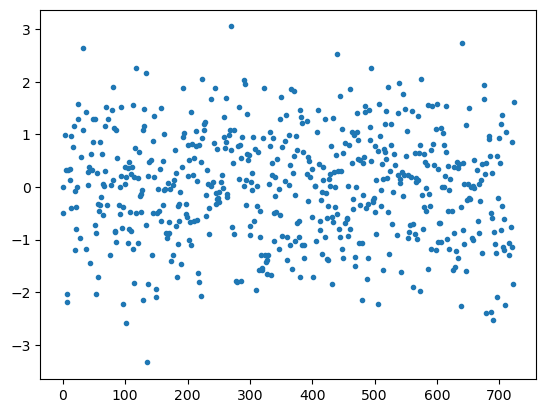

In [20]:
plt.plot(actual_pred_err.Error, '.')

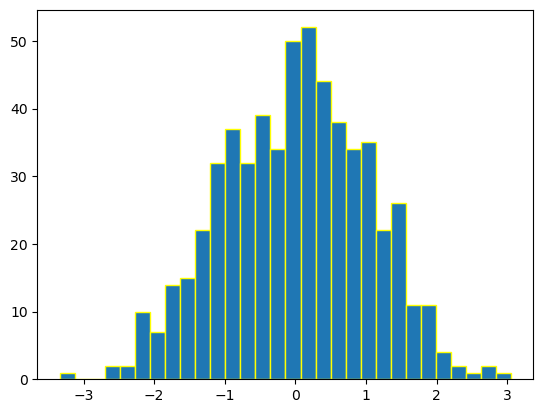

In [21]:
plt.hist(actual_pred_err.Error, bins=30, edgecolor = 'yellow');

<Axes: >

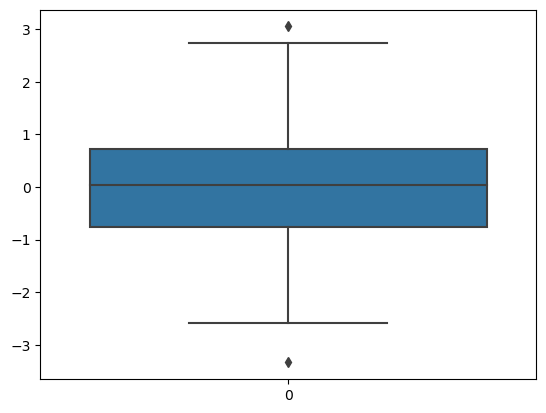

In [22]:
import seaborn as sns
sns.boxplot(actual_pred_err.Error)

In [23]:
import numpy as np
mse_train = np.mean(np.square(actual_pred_err.Error))
rmse_train= np.sqrt(mse_train)
mape_train= np.mean(np.abs((actual_pred_err.Error *100/actual_pred_err.Actual)))

In [24]:
mse_train

1.065955485088183

In [25]:
rmse_train

1.0324512022794021

In [26]:
mape_train

13.770162809701858

In [27]:
acc = 100 -mape_train
acc

86.22983719029814

In [28]:
pred_test = linreg.predict(lcn_test_x)
err_test =lcn_test_y - pred_test

In [29]:
mse_test =np.mean(np.square(err_test))
mse_test

0.9156354971115849

In [30]:
rmse_test = np.sqrt(mse_test)
rmse_test

0.9568884454896427

In [31]:
mape_test = np.mean(np.abs(err_test * 100 /lcn_test_y))
mape_test

11.999842115366077

In [32]:
acc_test = 100- mape_test
acc_test

88.00015788463392